<a href="https://colab.research.google.com/github/cloudmrhub/tess-tools/blob/main/tess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!! pip install git+https://github.com/cloudmrhub/tess-tools

['Collecting git+https://github.com/cloudmrhub/tess-tools',
 '  Cloning https://github.com/cloudmrhub/tess-tools to /tmp/pip-req-build-t87bdjo9',
 '  Running command git clone --filter=blob:none --quiet https://github.com/cloudmrhub/tess-tools /tmp/pip-req-build-t87bdjo9',
 '  Resolved https://github.com/cloudmrhub/tess-tools to commit d459e988dd974158eeee408b120037d7c4903d9f',
 '  Installing build dependencies ... \x1b[?25l\x1b[?25hdone',
 '  Getting requirements to build wheel ... \x1b[?25l\x1b[?25hdone',
 '  Preparing metadata (pyproject.toml) ... \x1b[?25l\x1b[?25hdone',
 'Collecting pynico_eros_montin@ git+https://github.com/erosmontin/pynico.git (from tess==2.0.0.5)',
 '  Cloning https://github.com/erosmontin/pynico.git to /tmp/pip-install-pz6_dpww/pynico-eros-montin_999a8178cc0d46748ce037ebeacb1ed1',
 '  Running command git clone --filter=blob:none --quiet https://github.com/erosmontin/pynico.git /tmp/pip-install-pz6_dpww/pynico-eros-montin_999a8178cc0d46748ce037ebeacb1ed1',
 ' 

/usr/local/lib/python3.11/dist-packages/tess/testdata/Head
Using executable /usr/local/lib/python3.11/dist-packages/tess/bin/cpptemperature
{'when': '14/07/2025, 21:21:33', 'what': {'what': 'Tess'}, 'type': 'start', 'settings': {'author': 'Eros Montin', 'mail': 'eros.montin@gmail.com', 'motto': 'Forty-six and two are just ahead of me'}, 'version': 'v0.0v'}
{'when': '14/07/2025, 21:21:33', 'what': 'Space set from /usr/local/lib/python3.11/dist-packages/tess/testdata/Head/MaterialDensity.nii.gz', 'type': 'procedure', 'settings': None}
{'when': '14/07/2025, 21:21:33', 'what': 'Space set to 179x179x50', 'type': 'procedure', 'settings': None}
{'when': '14/07/2025, 21:21:33', 'what': 'Space set to 0.005x0.005x0.005', 'type': 'procedure', 'settings': None}
{'when': '14/07/2025, 21:21:33', 'what': 'T0V set to 1602050', 'type': 'procedure', 'settings': None}
{'when': '14/07/2025, 21:21:49', 'what': 'Temperature calculation started /usr/local/lib/python3.11/dist-packages/tess/bin/cpptemperature 

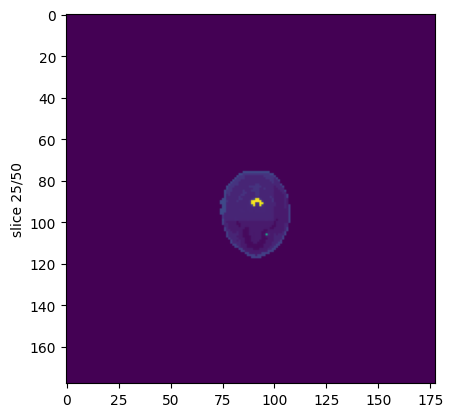

In [2]:
import importlib.resources
DIR = importlib.resources.files('tess').joinpath('testdata').joinpath('Head')

print(DIR)

import tess.tess as t
A=t.Tess()
import os

A.setSpace(os.path.join(DIR,'MaterialDensity.nii.gz'))
A.setHeatingTime(10)
A.setBloodPerfusionMap(os.path.join(DIR,'BloodPerfusion.nii.gz'))
A.setMaterialDensityMap(os.path.join(DIR,'MaterialDensity.nii.gz'))
A.setHeatCapacityMap(os.path.join(DIR,'HeatCapacity.nii.gz'))
A.setSARMap(os.path.join(DIR,'SAR.nii.gz'))
A.setThermalConductivityMap(os.path.join(DIR,'ThermalConductivity.nii.gz'))
A.setMetabolismHeatMap(os.path.join(DIR,'Metabolism.nii.gz'))

# set blood parameters
A.setBloodParameters(d={'capacity':1057,'density':3600,'temperature':310})
# set air parameters
A.setAirParameters(d={'capacity':1006,'density':1.3,'temperature':296,'metabolism':1006,'conductivity':0.026,'perfusion':0})

O=A.getOutput('/tmp/a.nii')
A.log.printWhatHappened()
print(A.params)
O.viewAxial()